### Question 1: Use yfinance to Extract Stock Data - Tesla

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(period="max")
tesla_history.reset_index(inplace=True)
print(tesla_history.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


###  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the Macrotrends Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_data = response.text

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables in the HTML
tables = soup.find_all("table")

# Step 4: Iterate through tables to find the one containing 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Step 5: Clean the DataFrame
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue.dropna(inplace=True)

# Step 6: Display the last five rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
58  2010-09-30     $31
59  2010-06-30     $28
60  2010-03-31     $21
62  2009-09-30     $46
63  2009-06-30     $27


### Question 3: Use yfinance to Extract Stock Data - GME

In [3]:
# Question 3: Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Display the first 5 rows of GameStop data
print("\nGameStop Stock Data:")
print(gme_data.head())


GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


### Question 4: Use Webscraping to Extract GME Revenue Data

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the Macrotrends GameStop revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_data = response.text

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables in the HTML
tables = soup.find_all("table")

# Step 4: Iterate through tables to find the one containing 'GameStop Quarterly Revenue'
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

# Step 5: Clean the DataFrame
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue.dropna(inplace=True)

# Step 6: Display the last five rows of the DataFrame
print(gme_revenue.tail())


          Date Revenue
60  2010-01-31  $3,524
61  2009-10-31  $1,835
62  2009-07-31  $1,739
63  2009-04-30  $1,981
64  2009-01-31  $3,492


### Plot Function

In [18]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


### Question 5: Plot Tesla Stock Graph

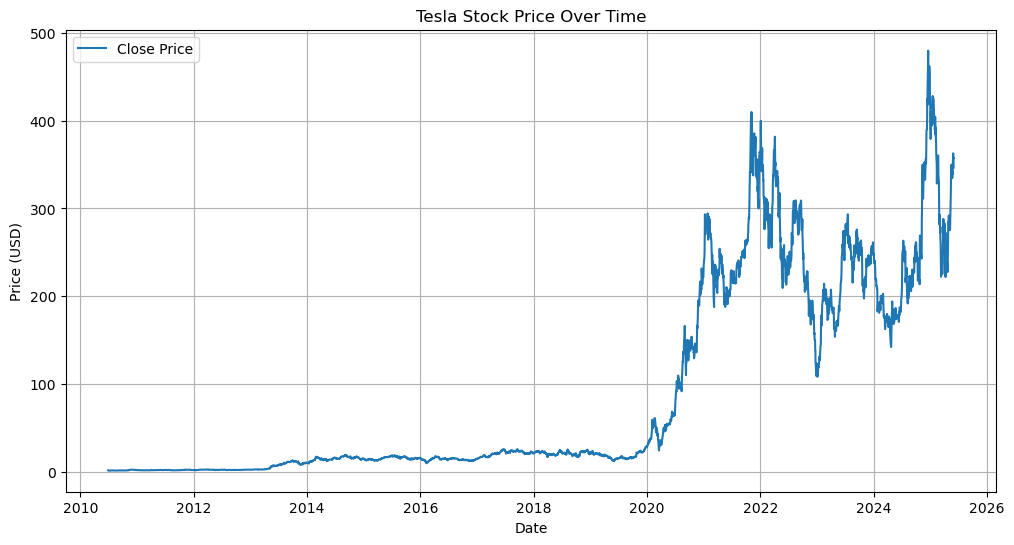

In [21]:
make_graph(tesla_history, "Tesla Stock Price Over Time")


### Question 6: Plot GameStop Stock Graph

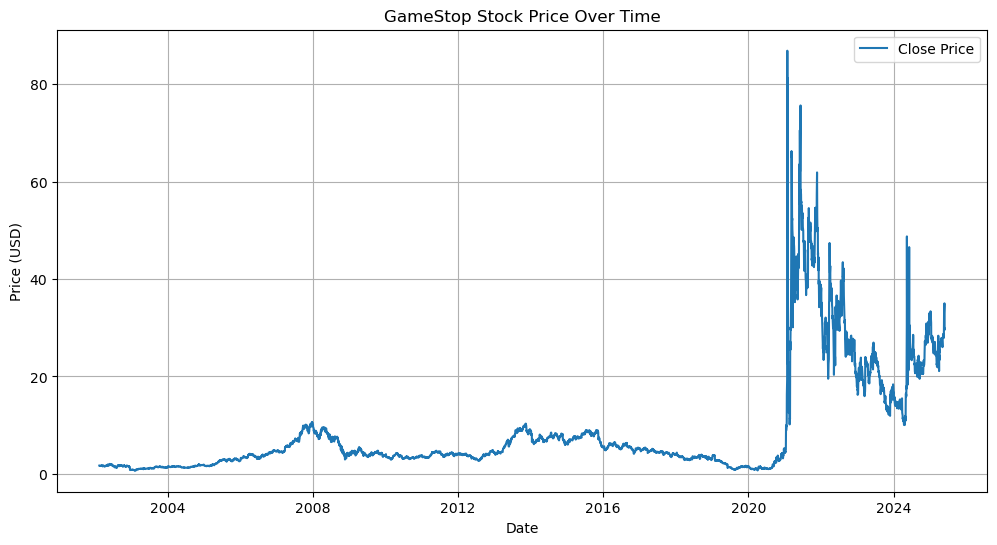

In [22]:
make_graph(gme_data, "GameStop Stock Price Over Time")
